In [1]:
import pandas as pd
import numpy as np
import glob as glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import scipy.misc as misc
import sys
import json
if any("/opt/ros/kinetic/lib/python2.7/dist-packages" in s for s in sys.path):

    sys.path.remove('/opt/ros/kinetic/lib/python2.7/dist-packages')
import cv2 as cv2
%matplotlib inline

In [2]:
files = glob.glob("path_2/*.jpg")
jsons = glob.glob("path_2/*.json")

print("There are {} images".format(len(files)))
df = pd.DataFrame(files, columns=["file"])
zs =[]
for data in jsons:
    with open(data) as f:
        j = json.load(f)
        print(j)
        print(j["angular"]["z"])
        zs.append(j["angular"]["z"])
print(zs)
print(df.head())
df["angular_z"]=zs
print(df.head())

#df[""]
# df["steer"] = df["file"].replace(to_replace="(.*)?leftimage_", value="", regex=True)
# df["steer"] = df["steer"].replace(to_replace=".jpg", value="", regex=True)
# df["steer"] = pd.to_numeric(df["steer"])

print(df.dtypes)
df.head()
df.shape

There are 1097 images
{'linear': {'x': 0.5036553025245666, 'y': 0.0, 'z': 0.0}, 'angular': {'x': 0.0, 'y': 0.0, 'z': -1.7178804874420166}}
-1.7178804874420166
{'linear': {'x': 0.6100203454494476, 'y': 0.0, 'z': 0.0}, 'angular': {'x': 0.0, 'y': 0.0, 'z': -0.3505227565765381}}
-0.3505227565765381
{'linear': {'x': 0.38213382959365844, 'y': 0.0, 'z': 0.0}, 'angular': {'x': 0.0, 'y': 0.0, 'z': 1.3923925161361694}}
1.3923925161361694
{'linear': {'x': 0.7619446754455566, 'y': 0.0, 'z': 0.0}, 'angular': {'x': 0.0, 'y': 0.0, 'z': -0.6543586254119873}}
-0.6543586254119873
{'linear': {'x': 0.6404232025146483, 'y': 0.0, 'z': 0.0}, 'angular': {'x': 0.0, 'y': 0.0, 'z': -0.78459233045578}}
-0.78459233045578
{'linear': {'x': 0.5036553025245666, 'y': 0.0, 'z': 0.0}, 'angular': {'x': 0.0, 'y': 0.0, 'z': -0.37217482924461365}}
-0.37217482924461365
{'linear': {'x': 0.44289456605911254, 'y': 0.0, 'z': 0.0}, 'angular': {'x': 0.0, 'y': 0.0, 'z': -1.1752934455871582}}
-1.1752934455871582
{'linear': {'x': 0.59

{'linear': {'x': 0.4580960154533386, 'y': 0.0, 'z': 0.0}, 'angular': {'x': 0.0, 'y': 0.0, 'z': 0.5676217675209045}}
0.5676217675209045
{'linear': {'x': 0.8075490236282348, 'y': 0.0, 'z': 0.0}, 'angular': {'x': 0.0, 'y': 0.0, 'z': 0.22035327553749084}}
0.22035327553749084
{'linear': {'x': 0.6252217948436737, 'y': 0.0, 'z': 0.0}, 'angular': {'x': 0.0, 'y': 0.0, 'z': -1.8046815395355225}}
-1.8046815395355225
{'linear': {'x': 0.7315868377685546, 'y': 0.0, 'z': 0.0}, 'angular': {'x': 0.0, 'y': 0.0, 'z': -0.3070901036262512}}
-0.3070901036262512
{'linear': {'x': 0.35173097252845764, 'y': 0.0, 'z': 0.0}, 'angular': {'x': 0.0, 'y': 0.0, 'z': 2.0}}
2.0
{'linear': {'x': 0.5796624660491942, 'y': 0.0, 'z': 0.0}, 'angular': {'x': 0.0, 'y': 0.0, 'z': -1.1752934455871582}}
-1.1752934455871582
{'linear': {'x': 0.4580960154533386, 'y': 0.0, 'z': 0.0}, 'angular': {'x': 0.0, 'y': 0.0, 'z': -0.78459233045578}}
-0.78459233045578
{'linear': {'x': 0.5036553025245666, 'y': 0.0, 'z': 0.0}, 'angular': {'x': 0.0

(1097, 2)

path_2/250.jpg
(480, 640, 3)


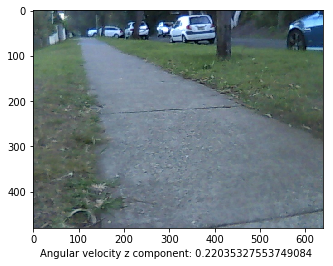

In [3]:
def show_image(index):
    print(df['file'][index])
    image = mpimg.imread(df['file'][index])
    print(image.shape)
    plt.imshow(image)
    plt.xlabel("Angular velocity z component: {} ".format(df['angular_z'][index]))

show_image(52)

In [4]:
def shuffle_images(df): 
    mask = df["angular_z"] == 0
    zeros = df[mask]
    nonzeros = df[mask==False]
    sample_size = int(zeros.shape[0]*0.10)
    zero_sample = zeros.sample(n=sample_size)
    
    return zero_sample.append(nonzeros).sample(frac=1).reset_index(drop=True)

sample = shuffle_images(df)
print(sample.shape[0])

1097


(1097, 44, 168, 3)
(1097, 1)
[[-1.73959684]
 [-0.0900553 ]
 [-0.65435863]
 [-0.13342372]
 [ 0.43738806]]


(array([109.,  57., 124., 188., 195.,  72.,  48.,  56.,  83., 165.]),
 array([-2. , -1.6, -1.2, -0.8, -0.4,  0. ,  0.4,  0.8,  1.2,  1.6,  2. ]),
 <a list of 10 Patch objects>)

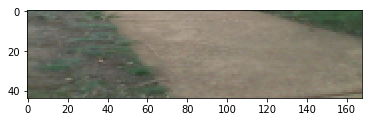

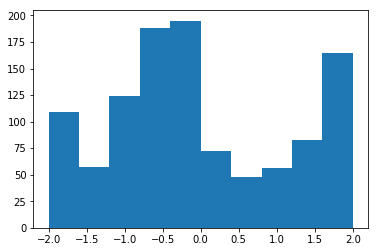

In [5]:
def get_images(df): 
    result = [] 
    for path in df["file"]:
        try:
            img = cv2.imread(path)
            img = img[200:, :]
    #         img = misc.imresize(img, (113,168))
            img = cv2.resize(img, (168, 44), interpolation=cv2.INTER_AREA)
            result.append(img)
        except: 
            print(path)
            continue
    return np.stack(result)

x = get_images(df)
print(x.shape)
y = df.as_matrix(columns=['angular_z'])
plt.imshow(x[0])
print(y.shape)
print(y[10:15])
plt.figure()
plt.hist(y)

In [6]:
# TODO: Build a model
import keras
from keras.models import Sequential, Model
from keras.layers import Cropping2D, Lambda, Input
from keras.layers.core import Activation, Dense, Flatten, Dropout
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D, AveragePooling2D
from keras.optimizers import Adam
from keras.applications.vgg16 import VGG16
from keras.layers import BatchNormalization
from keras.regularizers import l2

def Nvidia():
    model = Sequential()
#     model.add(Lambda(lambda x: (x / 255.0) - 0.5, input_shape=(64,64,3)))
    model.add(Conv2D(24, (3, 3), strides=(2, 2), padding="same", activation="relu", input_shape=(44,168,3)))
    model.add(BatchNormalization(axis=-1, gamma_regularizer=l2(0.0001), beta_regularizer=l2(0.0001)))
    model.add(Dropout(0.2))
    model.add(Conv2D(36, (3, 3), strides=(2, 2), padding="same", activation="relu"))
    model.add(BatchNormalization(axis=-1, gamma_regularizer=l2(0.0001), beta_regularizer=l2(0.0001)))
    model.add(Dropout(0.2))
    model.add(Conv2D(48, (3, 3), strides=(2, 2), padding="same", activation="relu"))
    model.add(BatchNormalization(axis=-1, gamma_regularizer=l2(0.0001), beta_regularizer=l2(0.0001)))
    model.add(Dropout(0.2))
    model.add(Conv2D(64, (3, 3), strides=(2, 2), padding="same", activation="relu"))
    model.add(BatchNormalization(axis=-1, gamma_regularizer=l2(0.0001), beta_regularizer=l2(0.0001)))
    model.add(Dropout(0.2))
    model.add(Conv2D(64, (3, 3), strides=(1, 1), padding="same", activation="relu"))
    model.add(BatchNormalization(axis=-1, gamma_regularizer=l2(0.0001), beta_regularizer=l2(0.0001)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(500, activation="relu"))
    model.add(Dense(125, activation="relu"))
    model.add(Dense(25, activation="relu"))
    model.add(Dense(1))
    adam = Adam(lr=0.001)
    model.compile(adam, 'mae')
    return model

model = Nvidia()
model.summary()

Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 22, 84, 24)        672       
_________________________________________________________________
batch_normalization_1 (Batch (None, 22, 84, 24)        96        
_________________________________________________________________
dropout_1 (Dropout)          (None, 22, 84, 24)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 42, 36)        7812      
_________________________________________________________________
batch_normalization_2 (Batch (None, 11, 42, 36)        144       
_________________________________________________________________
dropout_2 (Dropout)          (None, 11, 42, 36)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 6, 21, 48)         15600     
__________

-1.7178804874420166


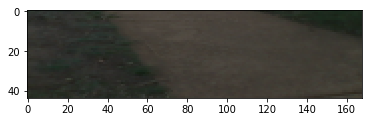

In [7]:
import random
import scipy.ndimage as ndi

def trans_image(image,steer):
    # Translation
    scale = np.random.normal(loc=0.0, scale=.5)
    steer_ang = steer + 0.1 * scale
    tx = 0
    ty = 100 * scale

    translation_matrix = np.float32([[1, 0, tx],
                                     [0, 1, ty],
                                     [0, 0, 1 ]])
#     image_tr = cv.warpAffine(image,translation_matrix,(image.shape[1],image.shape[0]))
    image_tr = apply_transform(image, translation_matrix)
    
    steer_ang = max(-0.34, steer_ang)
    steer_ang = min(0.34, steer_ang)
    
    return image_tr,steer_ang

def apply_transform(x,
                    transform_matrix,
                    channel_axis=2,
                    fill_mode='nearest',
                    cval=0.):
    """Apply the image transformation specified by a matrix.
    # Arguments
        x: 2D numpy array, single image.
        transform_matrix: Numpy array specifying the geometric transformation.
        channel_axis: Index of axis for channels in the input tensor.
        fill_mode: Points outside the boundaries of the input
            are filled according to the given mode
            (one of `{'constant', 'nearest', 'reflect', 'wrap'}`).
        cval: Value used for points outside the boundaries
            of the input if `mode='constant'`.
    # Returns
        The transformed version of the input.
    """
    x = np.rollaxis(x, channel_axis, 0)
    final_affine_matrix = transform_matrix[:2, :2]
    final_offset = transform_matrix[:2, 2]
    channel_images = [ndi.interpolation.affine_transform(
        x_channel,
        final_affine_matrix,
        final_offset,
        order=0,
        mode=fill_mode,
        cval=cval) for x_channel in x]
    x = np.stack(channel_images, axis=0)
    x = np.rollaxis(x, 0, channel_axis + 1)
    return x

def augment_brightness_camera_images(image):
    image1 = cv2.cvtColor(image,cv2.COLOR_RGB2HSV)
    random_bright = .25+np.random.uniform()
    toobright = image1[:,:,2] > 255/random_bright
    image1[:,:,2] = image1[:,:,2]*random_bright
    image1[:,:,2][toobright] = 255
    image1 = cv2.cvtColor(image1,cv2.COLOR_HSV2RGB)
    return image1

def crop_resize(img):
    img = img[200:, :]
#     img = cv.cvtColor(img, cv.COLOR_RGB2YUV)
    img = cv2.resize(img, (168, 44), interpolation=cv2.INTER_AREA)
    return img

def preprocess_img(row):
    img = None
    steering = None
    steering = row['angular_z']
        
    img = cv2.imread(row["file"])
    #Turn off image translation temporarily
    #img, steering = trans_image(img, steering)
    img = crop_resize(img)
    
    # randomly adjust brightness 
    img = augment_brightness_camera_images(img)
    
    #random flip
    flip = random.randint(0, 1)
    if flip == 1: 
        img = np.fliplr(img)
        steering = -steering
    
    return img, steering

img, steering = preprocess_img(df.iloc[0])
print(steering)
plt.imshow(img)

-1.7178804874420166


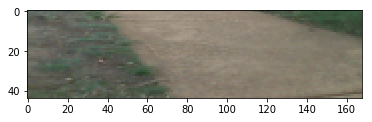

In [8]:
img, steering = preprocess_img(df.iloc[0])
print(steering)
plt.imshow(img)

In [9]:
## instead of above, and just plain training, let's use a generator to help randomly augment data

# df = df[(df['steering'] <= -0.01) | (df['steering'] >= 0.01)].reset_index(drop=True)

import sklearn
import cv2 as cv2
def generator(df, batch_size=256):
    
    while 1: # Loop forever so the generator never terminates
        x_sample = []
        y_sample = []
        pr_threshold = 1
        for i in range(batch_size):
            index = np.random.randint(len(df))
            row = df.iloc[index]
            image, steering = preprocess_img(row)
#             keep_pr = 0
#             while keep_pr == 0:
#                 image, steering = preprocess_img(row)
#                 pr_unif = np.random
#                 if abs(steering)<.001:
#                     pr_val = np.random.uniform()
#                     if pr_val>pr_threshold:
#                         keep_pr = 1
#                 else:
#                     keep_pr = 1
#             pr_threshold = 0.995 * pr_threshold
            x_sample.append(image)
            y_sample.append(steering)
        yield np.stack(x_sample), np.asarray(y_sample).reshape(batch_size, 1)
#         pr_threshold = 0.90 * pr_threshold

sample = shuffle_images(df)
train_generator = generator(sample)
validation_generator = generator(df)

(array([104.,  36.,  35.,  42.,  62.,  52.,  79.,  82.,  99.,  54.,  68.,
        101.,  66.,  71.,  46.,  50.,  37.,  49.,  44., 103.]),
 array([-2. , -1.8, -1.6, -1.4, -1.2, -1. , -0.8, -0.6, -0.4, -0.2,  0. ,
         0.2,  0.4,  0.6,  0.8,  1. ,  1.2,  1.4,  1.6,  1.8,  2. ]),
 <a list of 20 Patch objects>)

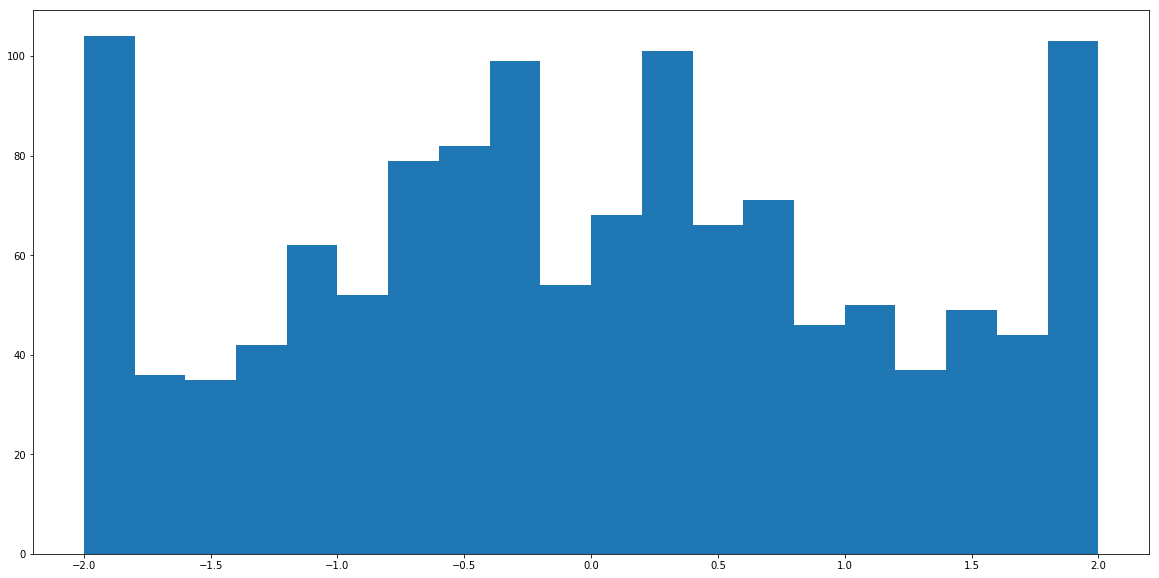

In [10]:
# testing distribution
test_y = [next(train_generator)[1] for i in range(5)]
test_y = np.vstack(test_y)

plt.figure(figsize=(20,10))
plt.hist(test_y, bins=20)
# this will shuffle a dataframe df.sample(frac=1).reset_index(drop=True)

In [11]:
histories=[]
for i in range(20):
    sample = shuffle_images(df)
    train_generator = generator(sample)
    model.optimizer.lr.assign(0.01)
    history = model.fit_generator(train_generator, steps_per_epoch=10, epochs=10, verbose=1)
    histories.append(history)

    print("We are now on iteration {}".format(i))

Epoch 1/10
10/10 [==============================] - 10s 1s/step - loss: 1.0918
Epoch 2/10
10/10 [==============================] - 10s 987ms/step - loss: 1.0434
Epoch 3/10
10/10 [==============================] - 10s 985ms/step - loss: 1.0418
Epoch 4/10
10/10 [==============================] - 10s 989ms/step - loss: 1.0394
Epoch 5/10
10/10 [==============================] - 10s 980ms/step - loss: 1.0238
Epoch 6/10
10/10 [==============================] - 10s 990ms/step - loss: 1.0150
Epoch 7/10
10/10 [==============================] - 10s 971ms/step - loss: 1.0066
Epoch 8/10
10/10 [==============================] - 10s 973ms/step - loss: 1.0253
Epoch 9/10
10/10 [==============================] - 10s 963ms/step - loss: 0.9922
Epoch 10/10
10/10 [==============================] - 10s 1s/step - loss: 1.0313
We are now on iteration 0
Epoch 1/10
10/10 [==============================] - 10s 997ms/step - loss: 1.0022
Epoch 2/10
10/10 [==============================] - 10s 967ms/step - loss: 1.

10/10 [==============================] - 11s 1s/step - loss: 0.3317
We are now on iteration 9
Epoch 1/10
10/10 [==============================] - 13s 1s/step - loss: 0.3317
Epoch 2/10
10/10 [==============================] - 13s 1s/step - loss: 0.3486
Epoch 3/10
10/10 [==============================] - 12s 1s/step - loss: 0.3322
Epoch 4/10
10/10 [==============================] - 12s 1s/step - loss: 0.3218
Epoch 5/10
10/10 [==============================] - 12s 1s/step - loss: 0.3162
Epoch 6/10
10/10 [==============================] - 12s 1s/step - loss: 0.3163
Epoch 7/10
10/10 [==============================] - 12s 1s/step - loss: 0.2997
Epoch 8/10
10/10 [==============================] - 12s 1s/step - loss: 0.2893
Epoch 9/10
10/10 [==============================] - 12s 1s/step - loss: 0.3002
Epoch 10/10
10/10 [==============================] - 13s 1s/step - loss: 0.3046
We are now on iteration 10
Epoch 1/10
10/10 [==============================] - 12s 1s/step - loss: 0.2906
Epoch 2/1

10/10 [==============================] - 10s 998ms/step - loss: 0.1639
We are now on iteration 19


dict_keys(['loss'])


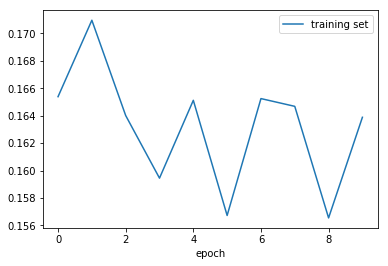

In [12]:
### print the keys contained in the history object
print(history.history.keys())

### plot the training and validation loss for each epoch
plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.legend(['training set', 'validation set'], loc='upper right')
plt.show()

In [13]:
model.save('./driving_net_model.h5')
model.save_weights("./driving_net_weights.h5")

In [ ]:
model.save('./driving_net_shift_model.h5')
model.save_weights("./driving_net_shift_weights.h5")

In [ ]:
from keras.models import load_model
model = load_model('./driving_net_shift_model.h5')

In [ ]:
import random

# x, y = next(generator(df))

diff = []
for i in range(1, 10):
    test_index=random.randint(0, len(df))
#     print(test_index)
    test_image = cv2.imread(df['file'][test_index])
    test_image = crop_resize(test_image)
    y  = df['angular_z'][test_index]
    %timeit prediction = model.predict(test_image[None, :, :, :], batch_size=1)[0][0]
    diff.append(prediction - y)
    plt.figure()
    plt.imshow(test_image)
    plt.title("".join(["index:", str(test_index), " actual: ", str(y), " prediction:", str(prediction)
                        , " diff:", str(prediction - y)]))
#     print("index:", test_index, " actual: ", y, " prediction:", prediction, " diff:", prediction - y)

print("std: ", np.array(diff).std())

   # Smaller CNN

In [ ]:
import keras
from keras.models import Sequential, Model
from keras.layers import Cropping2D, Lambda, Input
from keras.layers.core import Activation, Dense, Flatten, Dropout
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D, AveragePooling2D
from keras.optimizers import Adam
from keras.applications.vgg16 import VGG16
from keras.layers import BatchNormalization
from keras.regularizers import l2

def Nvidia():
    model = Sequential()
#     model.add(Lambda(lambda x: (x / 255.0) - 0.5, input_shape=(64,64,3)))
    model.add(Conv2D(12, (3, 3), strides=(2, 2), padding="same", activation="relu", input_shape=(44,168,3)))
    model.add(BatchNormalization(axis=-1, gamma_regularizer=l2(0.0001), beta_regularizer=l2(0.0001)))
    model.add(Dropout(0.2))
    model.add(Conv2D(18, (3, 3), strides=(2, 2), padding="same", activation="relu"))
    model.add(BatchNormalization(axis=-1, gamma_regularizer=l2(0.0001), beta_regularizer=l2(0.0001)))
    model.add(Dropout(0.2))
    model.add(Conv2D(24, (3, 3), strides=(2, 2), padding="same", activation="relu"))
    model.add(BatchNormalization(axis=1, gamma_regularizer=l2(0.0001), beta_regularizer=l2(0.0001)))
    model.add(Dropout(0.2))
    model.add(Conv2D(30, (3, 3), strides=(2, 2), padding="same", activation="relu"))
    model.add(BatchNormalization(axis=1, gamma_regularizer=l2(0.0001), beta_regularizer=l2(0.0001)))
    model.add(Dropout(0.2))
    model.add(Conv2D(36, (3, 3), strides=(1, 1), padding="same", activation="relu"))
    model.add(BatchNormalization(axis=1, gamma_regularizer=l2(0.0001), beta_regularizer=l2(0.0001)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(250, activation="relu"))
    model.add(Dense(40, activation="relu"))
    model.add(Dense(10, activation="relu"))
    model.add(Dense(1))
    adam = Adam(lr=0.001)
    model.compile(adam, 'mae')
    return model

model = Nvidia()
model.summary()

# Dilated Convolutional Neural Net

In [ ]:
import keras
from keras.models import Sequential, Model
from keras.layers import Cropping2D, Lambda, Input
from keras.layers.core import Activation, Dense, Flatten, Dropout
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D, AveragePooling2D
from keras.optimizers import Adam
from keras.applications.vgg16 import VGG16
from keras.layers import BatchNormalization
from keras.regularizers import l2

def Dilated():
    model = Sequential()
#     model.add(Lambda(lambda x: (x / 255.0) - 0.5, input_shape=(64,64,3)))
    model.add(Conv2D(12, (3, 3), strides=(2, 2), padding="same", activation="relu", input_shape=(44,168,3)))
#     model.add(BatchNormalization(axis=1, gamma_regularizer=l2(0.0001), beta_regularizer=l2(0.0001)))
    model.add(Dropout(0.2))
    model.add(Conv2D(12, (3, 3), strides=(1, 1), dilation_rate=(2,2), padding="same", activation="relu"))
#     model.add(BatchNormalization(axis=1, gamma_regularizer=l2(0.0001), beta_regularizer=l2(0.0001)))
    model.add(Dropout(0.2))
    model.add(Conv2D(18, (3, 3), strides=(4, 4), dilation_rate=(1,1), padding="same", activation="relu"))
#     model.add(BatchNormalization(axis=1, gamma_regularizer=l2(0.0001), beta_regularizer=l2(0.0001)))
    model.add(Dropout(0.2))
    model.add(Conv2D(18, (3, 3), strides=(1, 1), dilation_rate=(4,4), padding="same", activation="relu"))
#     model.add(BatchNormalization(axis=1, gamma_regularizer=l2(0.0001), beta_regularizer=l2(0.0001)))
    model.add(Dropout(0.2))
    model.add(Conv2D(24, (3, 3), strides=(2, 2), padding="same", activation="relu"))
#     model.add(BatchNormalization(axis=1, gamma_regularizer=l2(0.0001), beta_regularizer=l2(0.0001)))
#     model.add(Dropout(0.2))
#     model.add(Conv2D(48, (3, 3), strides=(1, 1), padding="same", activation="relu"))
#     model.add(BatchNormalization(axis=1, gamma_regularizer=l2(0.0001), beta_regularizer=l2(0.0001)))
# #     model.add(Dropout(0.2))
#     model.add(Conv2D(48, (3, 3), strides=(2, 2), padding="same", activation="relu"))
#     model.add(BatchNormalization(axis=1, gamma_regularizer=l2(0.0001), beta_regularizer=l2(0.0001)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(150, activation="relu"))
    model.add(Dense(30, activation="relu"))
    model.add(Dense(1))
    adam = Adam(lr=0.001)
    model.compile(adam, 'mae')
    return model

model = Dilated()
model.summary()

In [ ]:
for i in range(40):
    sample = shuffle_images(df)
    train_generator = generator(sample)
    model.optimizer.lr.assign(0.01)
    history = model.fit_generator(train_generator, steps_per_epoch=10, epochs=10, verbose=1)

In [ ]:
model.save('./driving_net_dilated_model.h5')
model.save_weights("./driving_net_dilated_weights.h5")

In [ ]:
import random

# x, y = next(generator(df))

diff = []
for i in range(1, 10):
    test_index=random.randint(0, len(df))
#     print(test_index)
    test_image = cv2.imread(df['file'][test_index])
    test_image = crop_resize(test_image)
    y  = df['steer'][test_index]
    %time prediction = model.predict(test_image[None, :, :, :], batch_size=1)[0][0]
    diff.append(prediction - y)
    plt.figure()
    plt.imshow(test_image)
    plt.title("".join(["index:", str(test_index), " actual: ", str(y), " prediction:", str(prediction)
                        , " diff:", str(prediction - y)]))
#     print("index:", test_index, " actual: ", y, " prediction:", prediction, " diff:", prediction - y)

print("std: ", np.array(diff).std())